## part-1

In [1]:
import pandas as pd
data = pd.read_csv('num_data.csv')
data

,sub_ms_class,frontge_lot,area_lot,shape_lot,slopeland,style_house,ovl_quality,ovl_condition,year_constructed,year_remod,...,configlot_Inside,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,type_building_2fmCon,type_building_Duplex,type_building_Twnhs,type_building_TwnhsE,saleprice
0,45,55.0,4388,1,1,2,5,7,1930,1950,...,1,0,0,0,1,0,0,0,0,87000
1,20,80.0,9600,0,1,1,7,6,1973,1973,...,1,0,0,0,1,0,0,0,0,175500
2,30,50.0,5330,0,1,1,4,7,1940,1950,...,1,0,0,0,1,0,0,0,0,82500
3,70,57.0,9906,0,1,4,4,4,1925,1950,...,1,0,0,0,1,0,0,0,0,107000
4,120,64.0,5587,1,2,1,8,5,2008,2008,...,1,0,0,0,1,0,0,0,1,392500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,75,75.0,13500,0,1,5,10,9,1893,2000,...,1,0,0,0,1,0,0,0,0,325000
1440,60,78.0,10140,0,1,4,7,5,1976,1976,...,1,0,0,0,1,0,0,0,0,162900
1441,20,124.0,16158,1,2,1,7,5,2005,2005,...,1,0,0,0,1,0,0,0,0,260000
1442,20,93.0,12085,0,1,1,8,5,2007,2007,...,1,0,0,0,1,0,0,0,0,318000


In [2]:
X = data.drop('saleprice', axis=1)
y = data['saleprice']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBRegressor

Root Mean Squared Error (RMSE): 30830.655
R² Score: 0.854


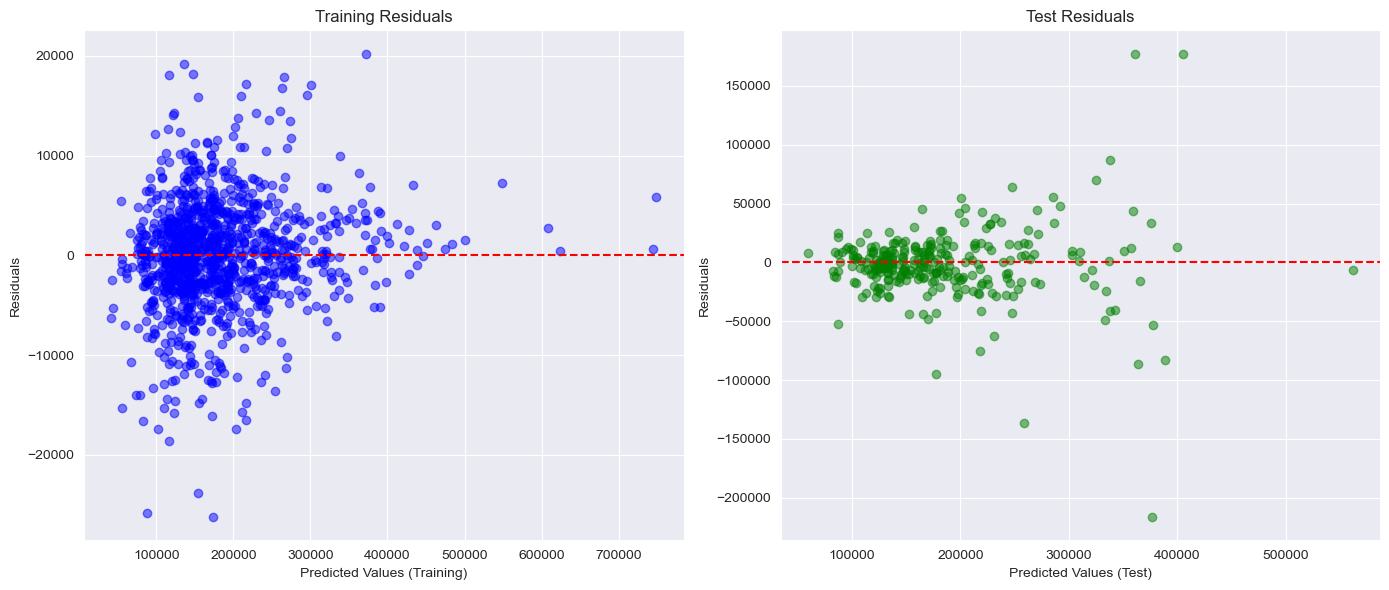

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

r_squared = r2_score(y_test, y_test_pred)
print(f"R² Score: {r_squared:.3f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_title('Training Residuals')
ax1.set_xlabel('Predicted Values (Training)')
ax1.set_ylabel('Residuals')

ax2.scatter(y_test_pred, test_residuals, color='green', alpha=0.5)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_title('Test Residuals')
ax2.set_xlabel('Predicted Values (Test)')
ax2.set_ylabel('Residuals')

plt.tight_layout()
# plt.savefig('plots/XGBRegressor_Residuals_00.png')
plt.show()


## Multiple Linear Regression

Root Mean Squared Error (RMSE): 47205.319
R² Score: 0.657


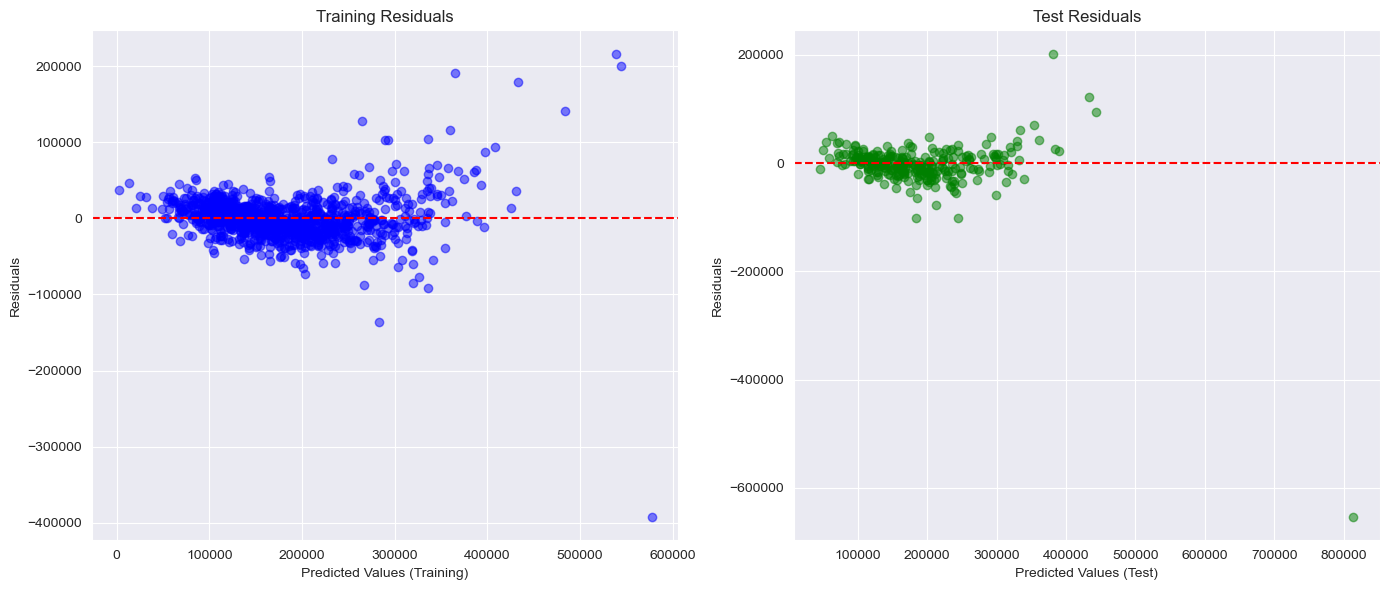

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate RMSE and R² for test data
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

r_squared = r2_score(y_test, y_test_pred)
print(f"R² Score: {r_squared:.3f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_title('Training Residuals')
ax1.set_xlabel('Predicted Values (Training)')
ax1.set_ylabel('Residuals')

ax2.scatter(y_test_pred, test_residuals, color='green', alpha=0.5)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_title('Test Residuals')
ax2.set_xlabel('Predicted Values (Test)')
ax2.set_ylabel('Residuals')

plt.tight_layout()
# plt.savefig('plots/Multiple_Linear_Regression_Residuals_00.png')
plt.show()


## This is part-2 after dealing with outliers

In [6]:
data2 = pd.read_csv("no_outlier.csv")
data2

,sub_ms_class,frontge_lot,area_lot,shape_lot,slopeland,style_house,ovl_quality,ovl_condition,year_constructed,year_remod,...,configlot_Inside,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,type_building_2fmCon,type_building_Duplex,type_building_Twnhs,type_building_TwnhsE,saleprice
0,45,55.0,4388,1,1,2,5,7,1930,1950,...,1,0,0,0,1,0,0,0,0,87000
1,20,80.0,9600,0,1,1,7,6,1973,1973,...,1,0,0,0,1,0,0,0,0,175500
2,30,50.0,5330,0,1,1,4,7,1940,1950,...,1,0,0,0,1,0,0,0,0,82500
3,70,57.0,9906,0,1,4,4,4,1925,1950,...,1,0,0,0,1,0,0,0,0,107000
4,20,80.0,9600,0,1,1,7,5,1969,1969,...,1,0,0,0,1,0,0,0,0,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,60,90.0,10800,0,1,4,6,7,1974,1997,...,1,0,0,0,1,0,0,0,0,240000
1256,120,36.0,4435,0,1,1,6,5,2003,2003,...,1,0,0,0,1,0,0,0,1,131500
1257,60,78.0,10140,0,1,4,7,5,1976,1976,...,1,0,0,0,1,0,0,0,0,162900
1258,20,93.0,12085,0,1,1,8,5,2007,2007,...,1,0,0,0,1,0,0,0,0,318000


In [7]:
X2 = data2.drop('saleprice', axis=1)
y2 = data2['saleprice']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## Multiple Linear Regression

Root Mean Squared Error (RMSE): 17512.194
R² Score: 0.904


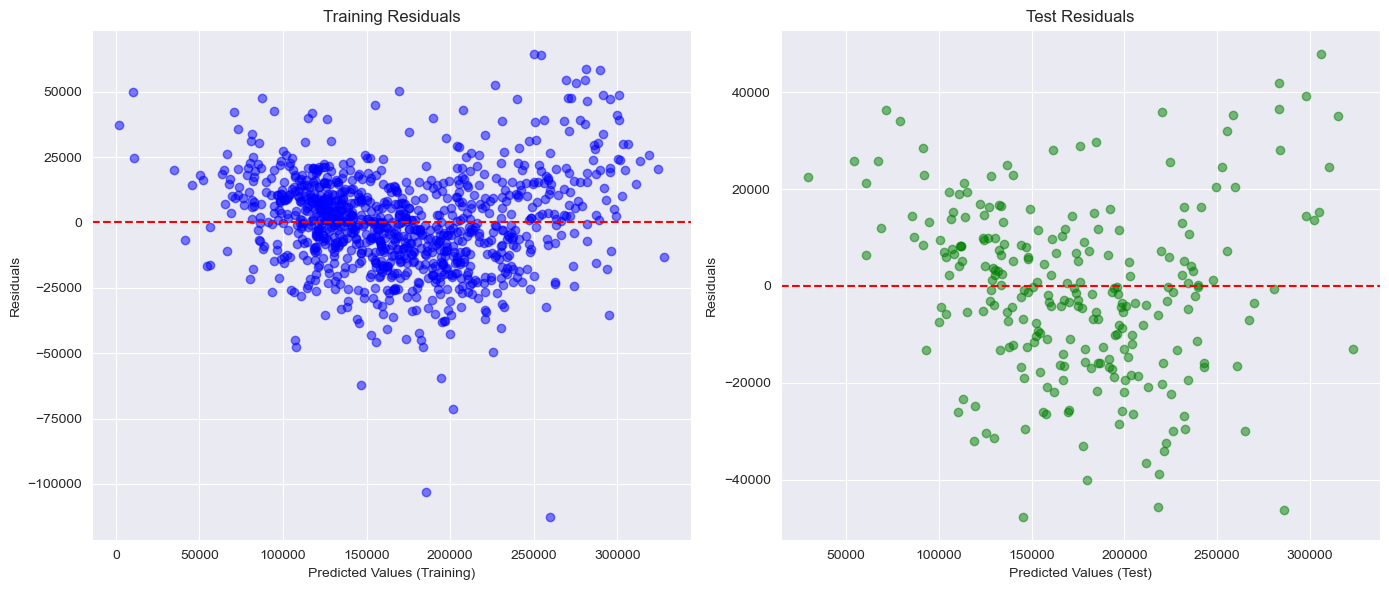

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate RMSE and R² for test data
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

r_squared = r2_score(y_test, y_test_pred)
print(f"R² Score: {r_squared:.3f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_title('Training Residuals')
ax1.set_xlabel('Predicted Values (Training)')
ax1.set_ylabel('Residuals')

ax2.scatter(y_test_pred, test_residuals, color='green', alpha=0.5)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_title('Test Residuals')
ax2.set_xlabel('Predicted Values (Test)')
ax2.set_ylabel('Residuals')

plt.tight_layout()
plt.show()


### Deduction of Results

 **Feature Importance**:
   - By analyzing the top 20 features based on their coefficients, we can identify which variables have the most influence on house price prediction. Features with larger absolute coefficients have a stronger relationship with the target variable (house price).
   - Positive coefficients indicate that an increase in the feature value will increase the house price, while negative coefficients suggest the opposite.

In [22]:
coefficients = lr_model.coef_

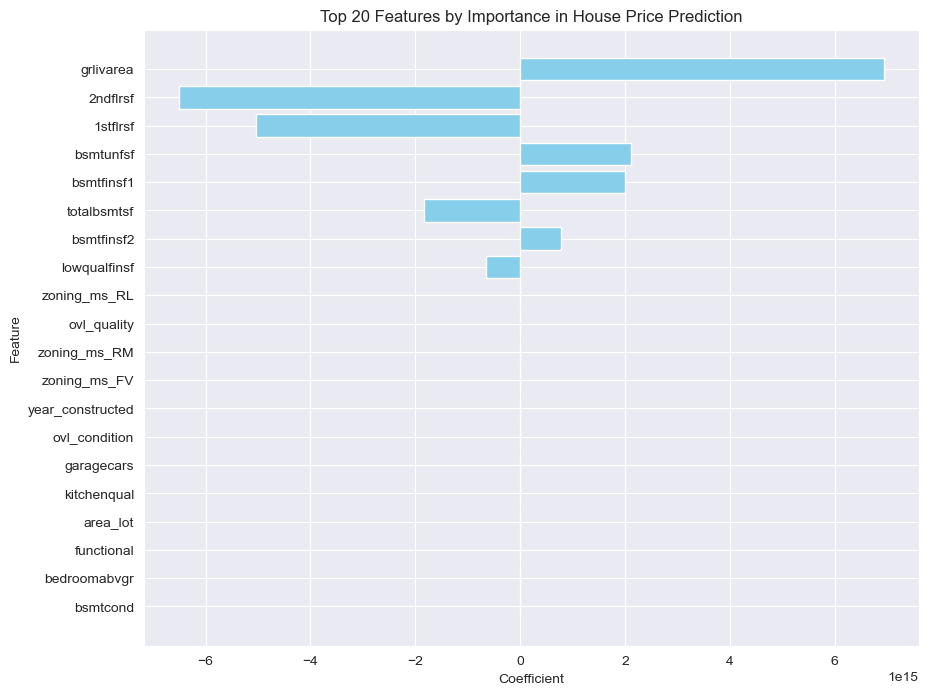

In [35]:
features = X2.columns 

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
})

top_features = feature_importance_df.reindex(feature_importance_df["Coefficient"].abs().nlargest(20).index)

# Plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(top_features["Feature"], top_features["Coefficient"], color='skyblue')
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Top 20 Features by Importance in House Price Prediction")
plt.gca().invert_yaxis() 
# plt.savefig('plots/Top_20 Features_by_Importance.png')
plt.show()

 **Statistical Significance**:
   - Features with a p-value less than 0.05 are statistically significant, meaning they have a strong likelihood of being relevant predictors for the target variable.
   - Features with p-values greater than 0.05 might be less important, and their exclusion from the model could potentially simplify the model without significant loss of predictive power.


In [24]:
import statsmodels.api as sm
X_train_scaled = sm.add_constant(X_train_scaled)  # Add constant term for intercept
model = sm.OLS(y_train, X_train_scaled).fit()

# Display the summary for p-values and coefficients
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     125.1
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:39:19   Log-Likelihood:                -11345.
No. Observations:                1008   AIC:                         2.283e+04
Df Residuals:                     937   BIC:                         2.318e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.694e+05    610.671    277.409      0.0

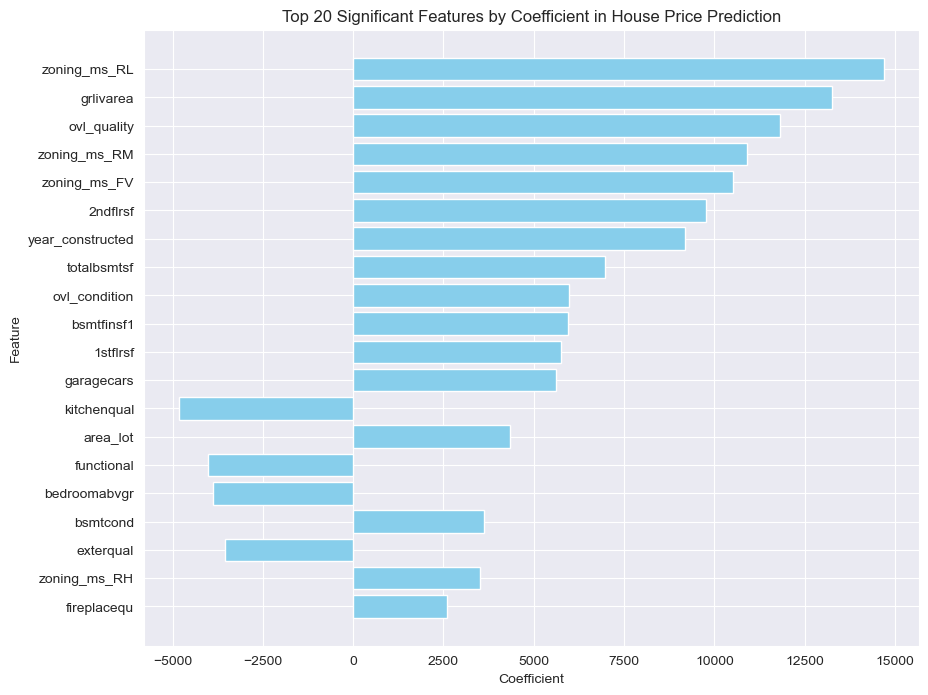

In [36]:
# Convert p-values and coefficients into a DataFrame
coeff_df = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model.params[1:],  # Exclude the intercept
    "P-Value": model.pvalues[1:]  # Exclude the intercept p-value
})

# Filter features with p-value < 0.05
significant_features = coeff_df[coeff_df["P-Value"] < 0.05]

# Select top 20 most significant features by absolute coefficient
top_features = significant_features.reindex(significant_features["Coefficient"].abs().nlargest(20).index)

plt.figure(figsize=(10, 8))
plt.barh(top_features["Feature"], top_features["Coefficient"], color='skyblue')
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Top 20 Significant Features by Coefficient in House Price Prediction")
plt.gca().invert_yaxis()  # To have the highest on top
# plt.savefig('plots/Top_20_Significant_Features.png')
plt.show()
